In [2]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:

file_path = 'data1.csv'

data = pd.read_csv(file_path)

print(data)

         X      Y  Class
0     5.50   7.00      1
1     9.40  13.00      1
2     6.00   6.80      1
3    12.50  13.00      0
4     5.50   5.60      1
..     ...    ...    ...
207  12.72  12.05      0
208  11.24   9.73      0
209  14.65  10.31      0
210  14.84  10.78      0
211  17.18  13.34      0

[212 rows x 3 columns]


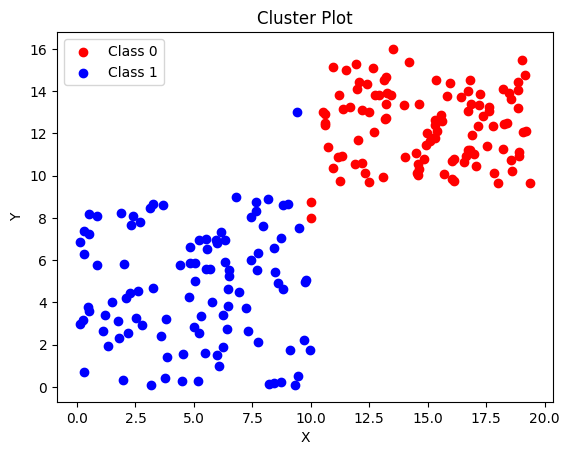

In [5]:

features = data[['X', 'Y']]
labels = data['Class']

class_0 = features[labels == 0]
class_1 = features[labels == 1]

plt.scatter(class_0['X'], class_0['Y'], c='red', label='Class 0')
plt.scatter(class_1['X'], class_1['Y'], c='blue', label='Class 1')

plt.title('Cluster Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

plt.show()

In [6]:
# normalize


features = data[['X', 'Y']]

scaler = StandardScaler()

normalized_features = scaler.fit_transform(features)

normalized_data = pd.DataFrame(normalized_features, columns=['X', 'Y'])

print(normalized_data)

            X         Y
0   -0.813747 -0.357511
1   -0.126986  0.998022
2   -0.725701 -0.402696
3    0.418901  0.998022
4   -0.813747 -0.673802
..        ...       ...
207  0.457641  0.783396
208  0.197024  0.259256
209  0.797500  0.390291
210  0.830958  0.496475
211  1.243014  1.074835

[212 rows x 2 columns]


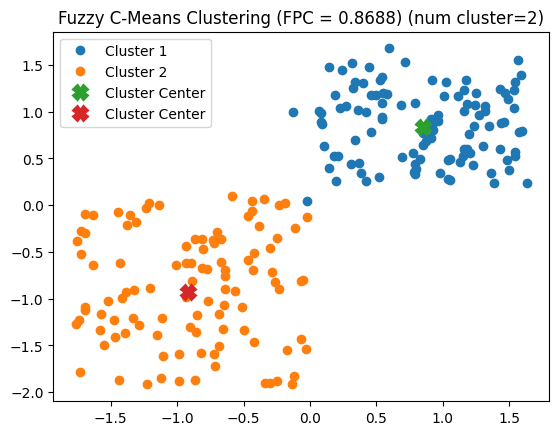

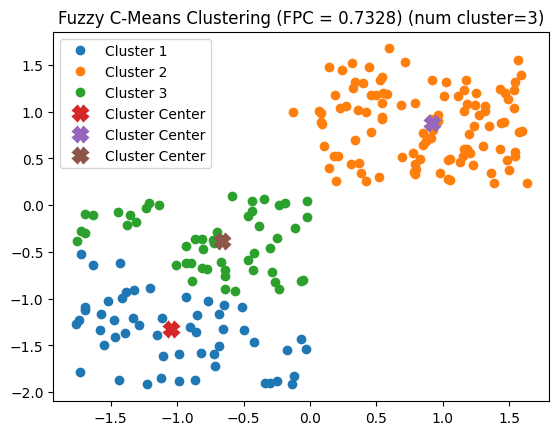

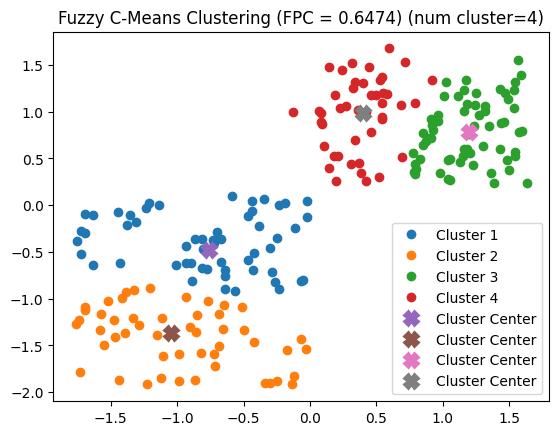

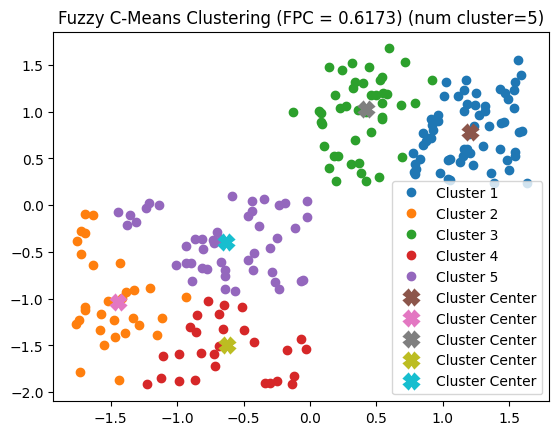

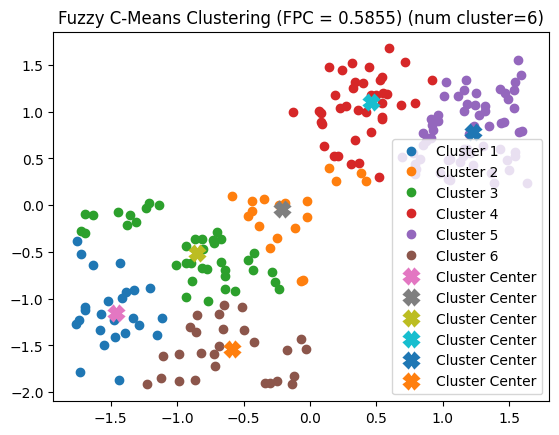

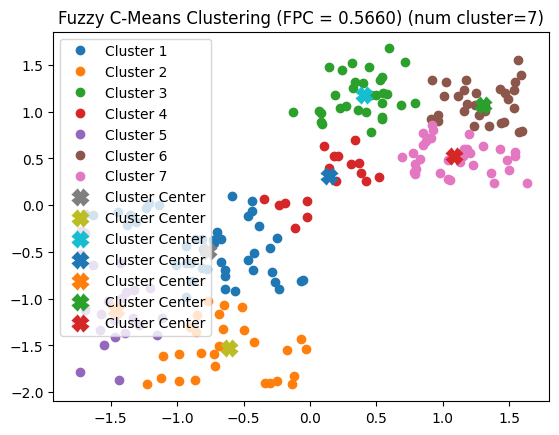

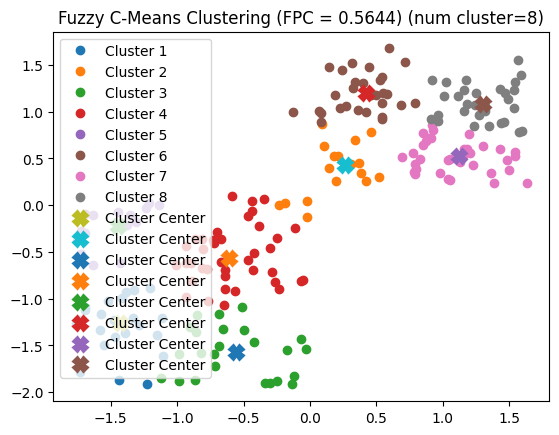

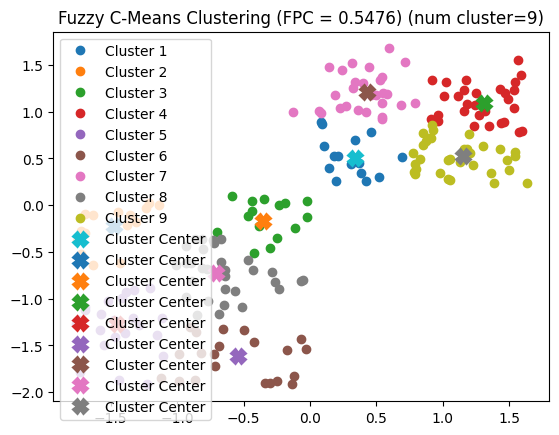

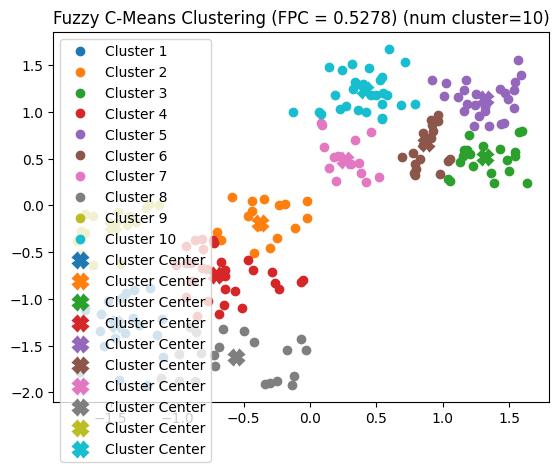

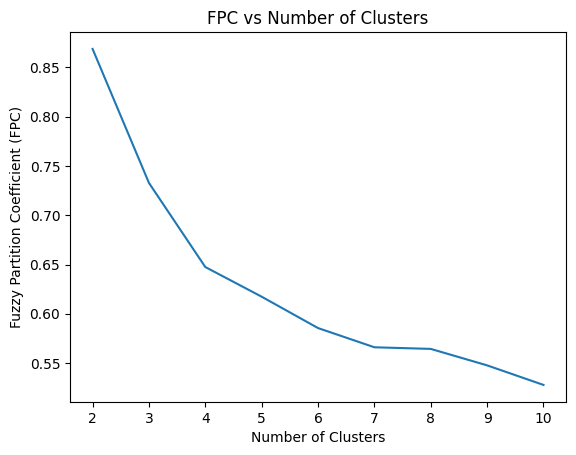

In [12]:
min_clusters = 2
max_clusters = 10

fpc_values = []

for num_clusters in range(min_clusters, max_clusters + 1):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(normalized_data.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)
    fpc_values.append(fpc)

    cluster_membership = np.argmax(u, axis=0)
    fig, ax = plt.subplots()

    for i in range(num_clusters):
        ax.plot(normalized_data[cluster_membership == i]['X'], normalized_data[cluster_membership == i]['Y'], 'o', label=f'Cluster {i + 1}')

    for cluster_center in cntr:
        ax.plot(cluster_center[0], cluster_center[1], 'X', markersize=10, markeredgewidth=2, label='Cluster Center')

    ax.set_title(f'Fuzzy C-Means Clustering (FPC = {fpc:.4f}) (num cluster={num_clusters})')
    ax.legend()
    plt.show()


plt.plot(range(min_clusters, max_clusters + 1), fpc_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('FPC vs Number of Clusters')
plt.show()

<h2>ِData 2</h2>

In [13]:
file_path = 'data2.csv'

data = pd.read_csv(file_path)

print(data)

            X         Y  Class
0   -0.842046  0.408155      0
1    0.096394 -0.852114      1
2   -0.964828  0.034454      0
3   -0.164699  0.817332      1
4    0.274231  0.756343      1
..        ...       ...    ...
295 -0.526197  0.815028      0
296  0.832952  0.086819      1
297 -0.900569 -0.555313      0
298 -0.534179 -0.513472      1
299 -0.949867 -0.258711      0

[300 rows x 3 columns]


In [14]:
# normalize


features = data[['X', 'Y']]

scaler = StandardScaler()

normalized_features = scaler.fit_transform(features)

normalized_data = pd.DataFrame(normalized_features, columns=['X', 'Y'])

print(normalized_data)

            X         Y
0   -1.315522  0.649213
1    0.141025 -1.323862
2   -1.506091  0.064147
3   -0.264216  1.289819
4    0.417045  1.194334
..        ...       ...
295 -0.825294  1.286212
296  1.284232  0.146129
297 -1.406355 -0.859190
298 -0.837684 -0.793684
299 -1.482871 -0.394832

[300 rows x 2 columns]


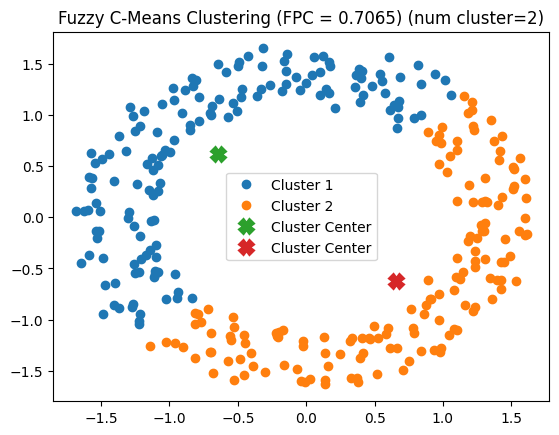

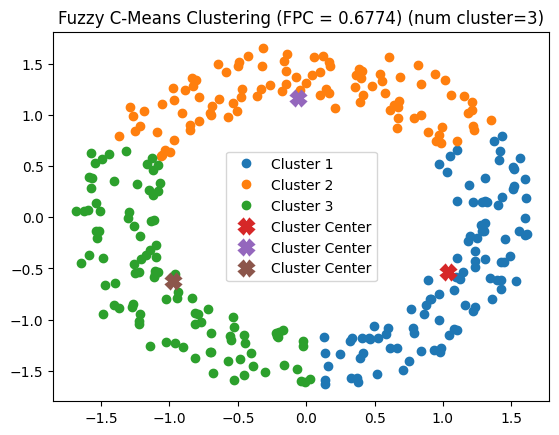

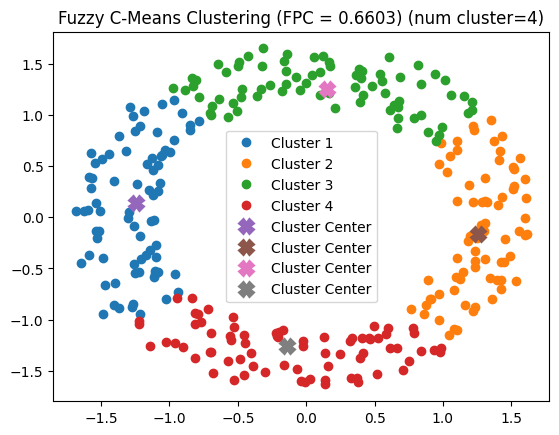

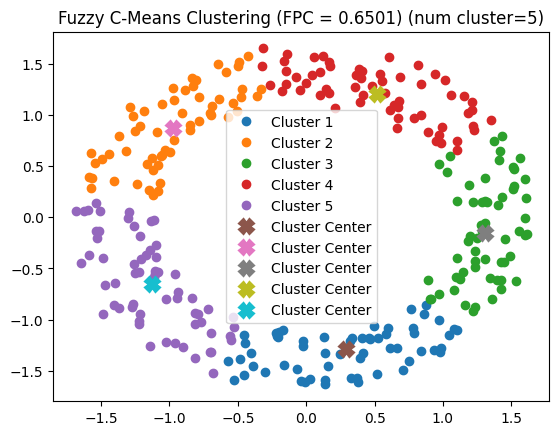

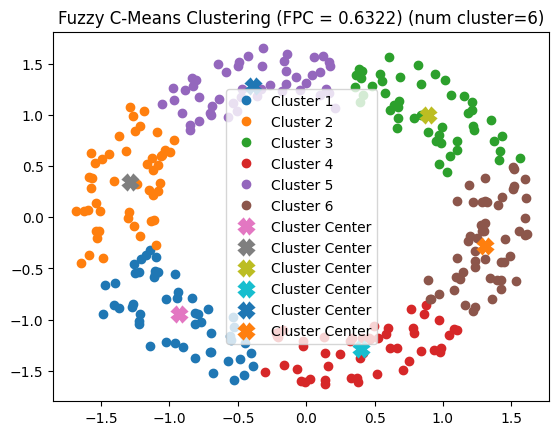

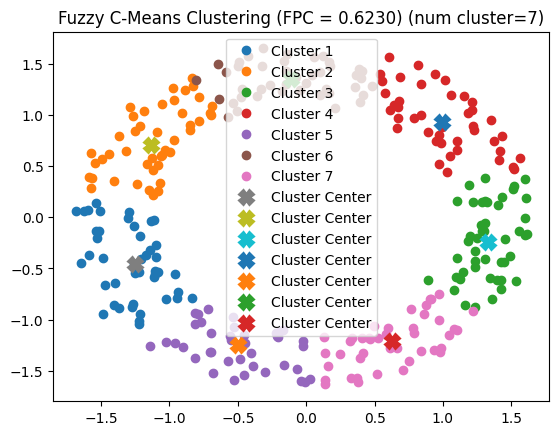

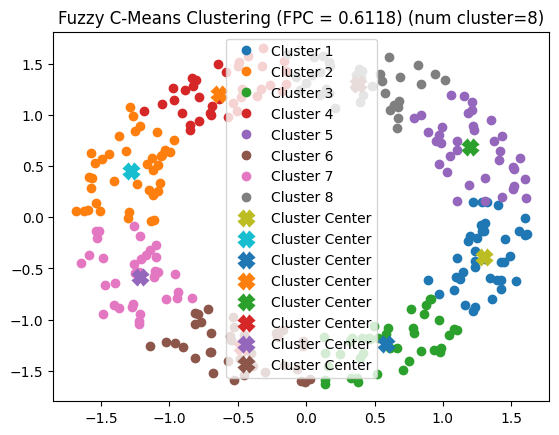

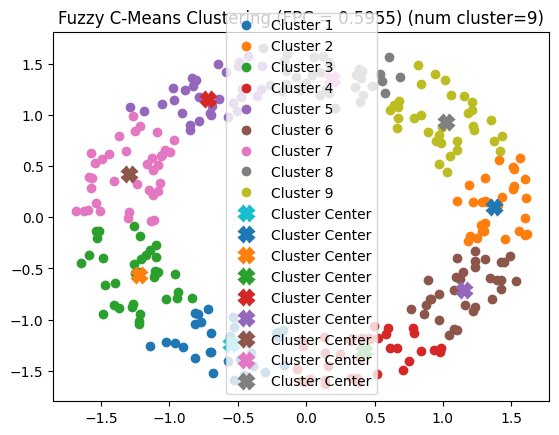

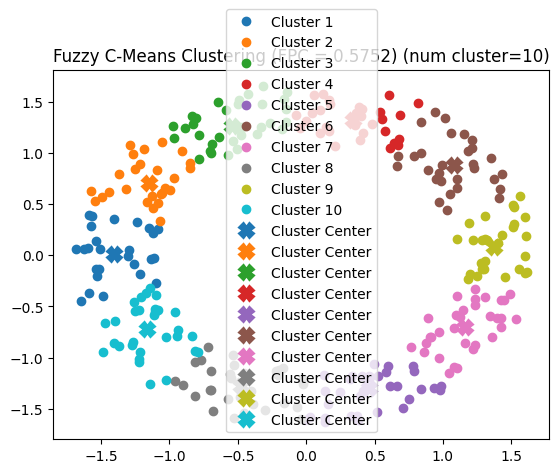

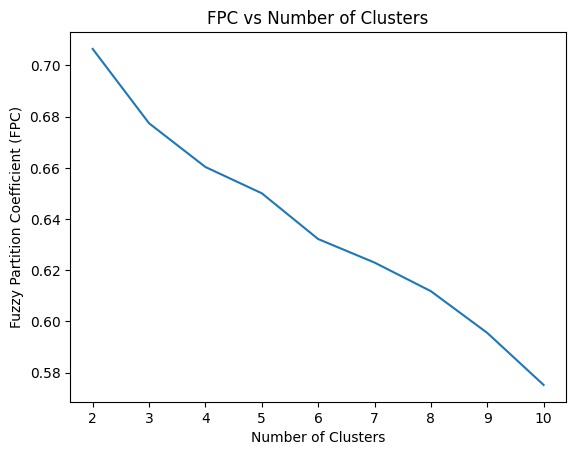

In [15]:
min_clusters = 2
max_clusters = 10

fpc_values = []

for num_clusters in range(min_clusters, max_clusters + 1):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(normalized_data.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)
    fpc_values.append(fpc)

    cluster_membership = np.argmax(u, axis=0)
    fig, ax = plt.subplots()

    for i in range(num_clusters):
        ax.plot(normalized_data[cluster_membership == i]['X'], normalized_data[cluster_membership == i]['Y'], 'o', label=f'Cluster {i + 1}')

    for cluster_center in cntr:
        ax.plot(cluster_center[0], cluster_center[1], 'X', markersize=10, markeredgewidth=2, label='Cluster Center')

    ax.set_title(f'Fuzzy C-Means Clustering (FPC = {fpc:.4f}) (num cluster={num_clusters})')
    ax.legend()
    plt.show()


plt.plot(range(min_clusters, max_clusters + 1), fpc_values)
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('FPC vs Number of Clusters')
plt.show()